In [3]:
from bs4 import BeautifulSoup
import requests
import csv
import json
import xml
import pandas as pd
import numpy as np
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

import matplotlib.cm as cm
import matplotlib.colors as colors

from sklearn.cluster import KMeans

import folium 
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
%matplotlib inline


In [102]:
CLIENT_ID = 'UCU4BWQYXQJZTNCNA4HS4YMZAJ512BPTSCQ0IWVGLEB3VTZS' # your Foursquare ID
CLIENT_SECRET = '5N4QI25V4XD4RKUPFQHTDMLM41OBJW0MSESDVTZWJB5M4DC3' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 50
#radius=10000
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: UCU4BWQYXQJZTNCNA4HS4YMZAJ512BPTSCQ0IWVGLEB3VTZS
CLIENT_SECRET:5N4QI25V4XD4RKUPFQHTDMLM41OBJW0MSESDVTZWJB5M4DC3


In [60]:
india_cities=pd.read_csv('india_cities.csv')
india_cities.head(10)

,city,lat,lng,country,iso2,admin,capital,population,population_proper
0,Mumbai,18.987807,72.836447,India,IN,Mahārāshtra,admin,18978000.0,12691836.0
1,Delhi,28.651952,77.231495,India,IN,Delhi,admin,15926000.0,7633213.0
2,Kolkata,22.562627,88.363044,India,IN,West Bengal,admin,14787000.0,4631392.0
3,Chennai,13.084622,80.248357,India,IN,Tamil Nādu,admin,7163000.0,4328063.0
4,Bengalūru,12.977063,77.587106,India,IN,Karnātaka,admin,6787000.0,5104047.0
5,Hyderabad,17.384052,78.456355,India,IN,Andhra Pradesh,admin,6376000.0,3597816.0
6,Ahmadābād,23.025793,72.587265,India,IN,Gujarāt,minor,5375000.0,3719710.0
7,Hāora,22.576882,88.318566,India,IN,West Bengal,NaN,4841638.0,1027672.0
8,Pune,18.513271,73.849852,India,IN,Mahārāshtra,NaN,4672000.0,2935744.0
9,Sūrat,21.195944,72.830232,India,IN,Gujarāt,NaN,3842000.0,2894504.0


In [61]:
india_cities_filtered=india_cities[['city','lat','lng','admin','population_proper']]
india_cities_filtered.shape

(212, 5)

In [93]:
india_cities_filtered.head(25)

,city,lat,lng,admin,population_proper
0,Mumbai,18.987807,72.836447,Mahārāshtra,12691836.0
1,Delhi,28.651952,77.231495,Delhi,7633213.0
2,Kolkata,22.562627,88.363044,West Bengal,4631392.0
3,Chennai,13.084622,80.248357,Tamil Nādu,4328063.0
4,Bengalūru,12.977063,77.587106,Karnātaka,5104047.0
5,Hyderabad,17.384052,78.456355,Andhra Pradesh,3597816.0
6,Ahmadābād,23.025793,72.587265,Gujarāt,3719710.0
7,Hāora,22.576882,88.318566,West Bengal,1027672.0
8,Pune,18.513271,73.849852,Mahārāshtra,2935744.0
9,Sūrat,21.195944,72.830232,Gujarāt,2894504.0


In [63]:
search_query1 = 'Medical Center'
search_query2 = 'College & University'
search_query3 = 'Food'
search_query4 = 'Shop & Service'
search_query5 = 'Travel & Transport'
radius = 5000
#print(search_query + ' .... OK!')

In [24]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, india_cities_filtered.loc[0]['lat'], india_cities_filtered.loc[0]['lng'], VERSION, search_query1, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=HROTCMH0HZAOI3DBSNSET2UDOX1SBMFM4PEXP3GGLFCCSRHO&client_secret=MC1G5CN3BFWNLAQBWBQW3HAXBKYST2IJUFZHX4LOCRQ52E0L&ll=18.987807,72.83644699999999&v=20180604&query=Medical Center&radius=5000&limit=500'

In [25]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5d2ebcf689b06a0034b21b9d'},
 'response': {'venues': [{'id': '5c5e5da74b78c5002cd1877c',
    'name': 'Shankeshwar Parshwanath Jain Medical Center',
    'location': {'address': 'Khaluck Dina terrace, d block, tejpal rd',
     'crossStreet': 'opp August kranti maidan, gowalia tank',
     'lat': 18.96297,
     'lng': 72.81004,
     'labeledLatLngs': [{'label': 'display',
       'lat': 18.96297,
       'lng': 72.81004}],
     'distance': 3920,
     'postalCode': '400007',
     'cc': 'IN',
     'city': 'Mumbai',
     'state': 'Mahārāshtra',
     'country': 'India',
     'formattedAddress': ['Khaluck Dina terrace, d block, tejpal rd (opp August kranti maidan, gowalia tank)',
      'Mumbai 400007',
      'Mahārāshtra',
      'India']},
    'categories': [{'id': '4bf58dd8d48988d177941735',
      'name': "Doctor's Office",
      'pluralName': "Doctor's Offices",
      'shortName': "Doctor's Office",
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categorie

In [26]:
len(results['response']['venues'])

50

In [95]:
#function to get venues within 5km of city centre
def get_venues(index,dfa):
    search_query1 = 'Medical Center'
    search_query2 = 'College & University'
    search_query3 = 'Food'
    search_query4 = 'Shop & Service'
    search_query5 = 'Travel & Transport'
    radius = 5000
    url1 = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, dfa.loc[index]['lat'], dfa.loc[index]['lng'], VERSION, search_query1, radius, LIMIT)
    url2 = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, dfa.loc[index]['lat'], dfa.loc[index]['lng'], VERSION, search_query2, radius, LIMIT)
    url3 = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, dfa.loc[index]['lat'], dfa.loc[index]['lng'], VERSION, search_query3, radius, LIMIT)
    url4 = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, dfa.loc[index]['lat'], dfa.loc[index]['lng'], VERSION, search_query4, radius, LIMIT)
    url5 = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, dfa.loc[index]['lat'], dfa.loc[index]['lng'], VERSION, search_query5, radius, LIMIT)
    results = requests.get(url1).json()
    m=len(results['response']['venues'])
    #dfa.loc[index]['medical']=len(results['response']['venues'])
    results = requests.get(url2).json()
    c=len(results['response']['venues'])
    #dfa.loc[index]['education']=len(results['response']['venues'])
    results = requests.get(url3).json()
    f=len(results['response']['venues'])
    #dfa.loc[index]['hotels']=len(results['response']['venues'])
    results = requests.get(url4).json()
    s=len(results['response']['venues'])
    #dfa.loc[index]['shops']=len(results['response']['venues'])
    results = requests.get(url5).json()
    t=len(results['response']['venues'])
    #dfa.loc[index]['transport']=len(results['response']['venues'])
    return [dfa.loc[index]['city'],m,c,f,s,t]

In [75]:
#create a dataframe
stats=pd.DataFrame(columns=['city','medical','education','food','shops','transport'])

In [67]:
india_cities_filtered.head()

,city,lat,lng,admin,population_proper
0,Mumbai,18.987807,72.836447,Mahārāshtra,12691836.0
1,Delhi,28.651952,77.231495,Delhi,7633213.0
2,Kolkata,22.562627,88.363044,West Bengal,4631392.0
3,Chennai,13.084622,80.248357,Tamil Nādu,4328063.0
4,Bengalūru,12.977063,77.587106,Karnātaka,5104047.0


In [105]:
for i in range(208,len(india_cities_filtered)):
    stats.loc[len(stats), :] = get_venues(i,india_cities_filtered)
    #print(india_cities_filtered.loc[i]['city']," ",get_venues(i,india_cities_filtered))

In [106]:
stats

,city,medical,education,food,shops,transport
0,Mumbai,50,50,50,50,45
1,Delhi,50,47,49,50,50
2,Kolkata,50,50,50,50,50
3,Chennai,50,50,50,50,50
4,Bengalūru,50,50,50,50,50
5,Hyderabad,50,50,50,50,47
6,Ahmadābād,50,30,50,46,33
7,Hāora,50,42,29,50,33
8,Pune,50,50,50,50,50
9,Sūrat,50,21,42,47,11


In [107]:
#save data received from foursquare search
stats.to_csv('city_stats.csv')

In [109]:
#merge both datasets using join 
indian_city_stats=india_cities_filtered.join(stats,lsuffix='_caller', rsuffix='_other')

In [111]:
indian_city_stats.head(10)

,city_caller,lat,lng,admin,population_proper,city_other,medical,education,food,shops,transport
0,Mumbai,18.987807,72.836447,Mahārāshtra,12691836.0,Mumbai,50,50,50,50,45
1,Delhi,28.651952,77.231495,Delhi,7633213.0,Delhi,50,47,49,50,50
2,Kolkata,22.562627,88.363044,West Bengal,4631392.0,Kolkata,50,50,50,50,50
3,Chennai,13.084622,80.248357,Tamil Nādu,4328063.0,Chennai,50,50,50,50,50
4,Bengalūru,12.977063,77.587106,Karnātaka,5104047.0,Bengalūru,50,50,50,50,50
5,Hyderabad,17.384052,78.456355,Andhra Pradesh,3597816.0,Hyderabad,50,50,50,50,47
6,Ahmadābād,23.025793,72.587265,Gujarāt,3719710.0,Ahmadābād,50,30,50,46,33
7,Hāora,22.576882,88.318566,West Bengal,1027672.0,Hāora,50,42,29,50,33
8,Pune,18.513271,73.849852,Mahārāshtra,2935744.0,Pune,50,50,50,50,50
9,Sūrat,21.195944,72.830232,Gujarāt,2894504.0,Sūrat,50,21,42,47,11


In [113]:
del indian_city_stats['city_other']

In [114]:
indian_city_stats.head()

,city_caller,lat,lng,admin,population_proper,medical,education,food,shops,transport
0,Mumbai,18.987807,72.836447,Mahārāshtra,12691836.0,50,50,50,50,45
1,Delhi,28.651952,77.231495,Delhi,7633213.0,50,47,49,50,50
2,Kolkata,22.562627,88.363044,West Bengal,4631392.0,50,50,50,50,50
3,Chennai,13.084622,80.248357,Tamil Nādu,4328063.0,50,50,50,50,50
4,Bengalūru,12.977063,77.587106,Karnātaka,5104047.0,50,50,50,50,50


In [115]:
indian_city_stats.columns=['city','lat','lng','state','population','medical','education','food','shops','transport']
indian_city_stats.head()

,city,lat,lng,state,population,medical,education,food,shops,transport
0,Mumbai,18.987807,72.836447,Mahārāshtra,12691836.0,50,50,50,50,45
1,Delhi,28.651952,77.231495,Delhi,7633213.0,50,47,49,50,50
2,Kolkata,22.562627,88.363044,West Bengal,4631392.0,50,50,50,50,50
3,Chennai,13.084622,80.248357,Tamil Nādu,4328063.0,50,50,50,50,50
4,Bengalūru,12.977063,77.587106,Karnātaka,5104047.0,50,50,50,50,50


In [116]:
indian_city_stats.to_csv('indian_city_stats.csv')

In [117]:
indian_city_stats.dtypes

city           object
lat           float64
lng           float64
state          object
population    float64
medical        object
education      object
food           object
shops          object
transport      object
dtype: object

In [120]:
indian_city_stats['medical'] = indian_city_stats.medical.astype(float)
indian_city_stats['education'] = indian_city_stats.education.astype(float)
indian_city_stats['food'] = indian_city_stats.food.astype(float)
indian_city_stats['shops'] = indian_city_stats.shops.astype(float)
indian_city_stats['transport'] = indian_city_stats.transport.astype(float)
indian_city_stats.dtypes

city           object
lat           float64
lng           float64
state          object
population    float64
medical       float64
education     float64
food          float64
shops         float64
transport     float64
dtype: object

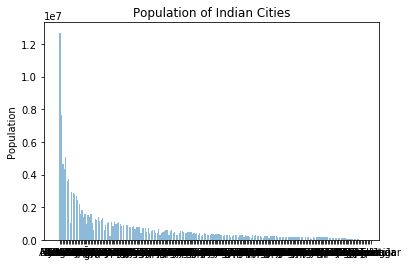

In [4]:
y_pos = np.arange(len(indian_city_stats))

plt.bar(y_pos, indian_city_stats[:]['population'], align='center', alpha=0.5)
plt.xticks(y_pos, indian_city_stats[:]['city'])
plt.ylabel('Population')
plt.title('Population of Indian Cities')
plt.show()

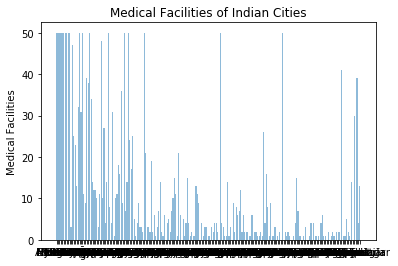

In [5]:
y_pos = np.arange(len(indian_city_stats))

plt.bar(y_pos, indian_city_stats[:]['medical'], align='center', alpha=0.5)
plt.xticks(y_pos, indian_city_stats[:]['city'])
plt.ylabel('Medical Facilities')
plt.title('Medical Facilities of Indian Cities')
plt.show()

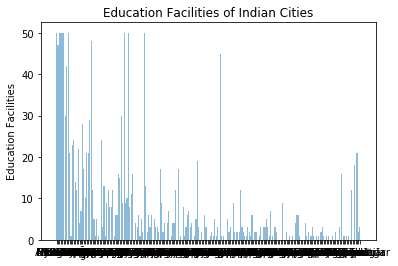

In [6]:
y_pos = np.arange(len(indian_city_stats))

plt.bar(y_pos, indian_city_stats[:]['education'], align='center', alpha=0.5)
plt.xticks(y_pos, indian_city_stats[:]['city'])
plt.ylabel('Education Facilities')
plt.title('Education Facilities of Indian Cities')
plt.show()

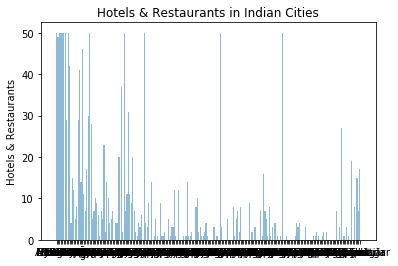

In [7]:
y_pos = np.arange(len(indian_city_stats))

plt.bar(y_pos, indian_city_stats[:]['food'], align='center', alpha=0.5)
plt.xticks(y_pos, indian_city_stats[:]['city'])
plt.ylabel('Hotels & Restaurants')
plt.title('Hotels & Restaurants in Indian Cities')
plt.show()

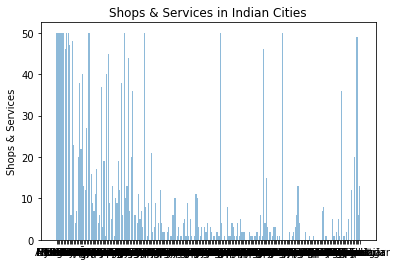

In [8]:
y_pos = np.arange(len(indian_city_stats))

plt.bar(y_pos, indian_city_stats[:]['shops'], align='center', alpha=0.5)
plt.xticks(y_pos, indian_city_stats[:]['city'])
plt.ylabel('Shops & Services')
plt.title('Shops & Services in Indian Cities')
plt.show()

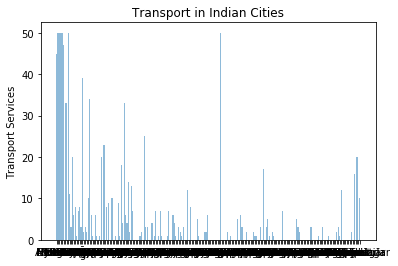

In [9]:
y_pos = np.arange(len(indian_city_stats))

plt.bar(y_pos, indian_city_stats[:]['transport'], align='center', alpha=0.5)
plt.xticks(y_pos, indian_city_stats[:]['city'])
plt.ylabel('Transport Services')
plt.title('Transport in Indian Cities')
plt.show()

In [129]:
#plot these cities on map
city_map = folium.Map(location=[22.3511148, 78.6677428], zoom_start=4) # generate map centred around Madhya Pradesh

# add cities
for lat, lng, label in zip(indian_city_stats.lat, indian_city_stats.lng, indian_city_stats.city):
    folium.CircleMarker(
        [lat, lng],
        radius=1,
        popup=label,
        fill=True,
        color='red',
        fill_color='red',
        fill_opacity=0.6
        ).add_to(city_map)

# display map
city_map

In [10]:
indian_city_stats

,Unnamed: 0,city,lat,lng,state,population,medical,education,food,shops,transport
0,0,Mumbai,18.987807,72.836447,Mahārāshtra,12691836.0,50,50,50,50,45
1,1,Delhi,28.651952,77.231495,Delhi,7633213.0,50,47,49,50,50
2,2,Kolkata,22.562627,88.363044,West Bengal,4631392.0,50,50,50,50,50
3,3,Chennai,13.084622,80.248357,Tamil Nādu,4328063.0,50,50,50,50,50
4,4,Bengalūru,12.977063,77.587106,Karnātaka,5104047.0,50,50,50,50,50
5,5,Hyderabad,17.384052,78.456355,Andhra Pradesh,3597816.0,50,50,50,50,47
6,6,Ahmadābād,23.025793,72.587265,Gujarāt,3719710.0,50,30,50,46,33
7,7,Hāora,22.576882,88.318566,West Bengal,1027672.0,50,42,29,50,33
8,8,Pune,18.513271,73.849852,Mahārāshtra,2935744.0,50,50,50,50,50
9,9,Sūrat,21.195944,72.830232,Gujarāt,2894504.0,50,21,42,47,11


In [11]:
indian_city_stats.fillna(indian_city_stats.mean(), inplace=True)

In [12]:
#get feature set for kmeans 
X = np.array(indian_city_stats.drop(['city','lat','lng','state','population','Unnamed: 0'], 1).astype(float))
X

array([[50., 50., 50., 50., 45.],
       [50., 47., 49., 50., 50.],
       [50., 50., 50., 50., 50.],
       ...,
       [39., 21., 15., 49., 20.],
       [ 4.,  2.,  7.,  6.,  0.],
       [13.,  3., 17., 13., 10.]])

In [34]:
k_means = KMeans(init="k-means++", n_clusters=4, n_init=12)
k_means.fit(X)
k_means_labels = k_means.labels_
k_means_labels
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[ 2.58741259,  1.88811189,  1.58041958,  2.06293706,  0.83916084],
       [50.        , 44.35714286, 48.14285714, 49.        , 42.07142857],
       [40.9375    , 21.3125    , 25.9375    , 39.1875    , 11.75      ],
       [15.87179487, 10.1025641 ,  9.61538462, 12.66666667,  4.97435897]])

In [35]:
k_means_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 3, 3, 3, 2, 2, 3, 1, 3, 3, 2,
       2, 1, 2, 3, 3, 3, 3, 0, 0, 2, 0, 3, 0, 3, 2, 0, 0, 3, 0, 3, 3, 3,
       3, 2, 0, 1, 3, 3, 2, 3, 3, 2, 0, 0, 0, 3, 0, 0, 0, 1, 3, 0, 0, 0,
       3, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 3, 0, 0,
       0, 0, 0, 3, 0, 0, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 3, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 2, 0, 3])

In [36]:
#add labels predicted by k-means to the dataframe
indian_city_stats['tier']=k_means_labels

In [37]:
indian_city_stats

,Unnamed: 0,city,lat,lng,state,population,medical,education,food,shops,transport,tier
0,0,Mumbai,18.987807,72.836447,Mahārāshtra,1.269184e+07,50,50,50,50,45,1
1,1,Delhi,28.651952,77.231495,Delhi,7.633213e+06,50,47,49,50,50,1
2,2,Kolkata,22.562627,88.363044,West Bengal,4.631392e+06,50,50,50,50,50,1
3,3,Chennai,13.084622,80.248357,Tamil Nādu,4.328063e+06,50,50,50,50,50,1
4,4,Bengalūru,12.977063,77.587106,Karnātaka,5.104047e+06,50,50,50,50,50,1
5,5,Hyderabad,17.384052,78.456355,Andhra Pradesh,3.597816e+06,50,50,50,50,47,1
6,6,Ahmadābād,23.025793,72.587265,Gujarāt,3.719710e+06,50,30,50,46,33,1
7,7,Hāora,22.576882,88.318566,West Bengal,1.027672e+06,50,42,29,50,33,1
8,8,Pune,18.513271,73.849852,Mahārāshtra,2.935744e+06,50,50,50,50,50,1
9,9,Sūrat,21.195944,72.830232,Gujarāt,2.894504e+06,50,21,42,47,11,2


In [38]:
#plot these cities on map
city_map = folium.Map(location=[22.3511148, 78.6677428], zoom_start=4) # generate map centred around Madhya Pradesh
group0 = folium.FeatureGroup(name='<span  style="height: 15px; width: 15px; background-color: blue  ; border-radius: 50%; display: inline-block;"></span>Tier IV Cities')
group1 = folium.FeatureGroup(name='<span  style="height: 15px; width: 15px; background-color: red   ; border-radius: 50%; display: inline-block;"></span>Tier I Cities')
group2 = folium.FeatureGroup(name='<span  style="height: 15px; width: 15px; background-color: green ; border-radius: 50%; display: inline-block;"></span>Tier II Cities')
group3 = folium.FeatureGroup(name='<span  style="height: 15px; width: 15px; background-color: yellow; border-radius: 50%; display: inline-block;"></span>Tier III Cities')
# add cities
for lat, lng, label, tier in zip(indian_city_stats.lat, indian_city_stats.lng, indian_city_stats.city,indian_city_stats.tier):
    if tier==1:
        folium.CircleMarker(
            [lat, lng],
            radius=2,
            popup=label,
            fill=True,
            color='red',
            fill_color='red',
            fill_opacity=0.6
            ).add_to(group1)
    elif tier==2:
        folium.CircleMarker(
                [lat, lng],
                radius=2,
                popup=label,
                fill=True,
                color='green',
                fill_color='green',
                fill_opacity=0.6
                ).add_to(group2)
    elif tier==3:
        folium.CircleMarker(
            [lat, lng],
            radius=2,
            popup=label,
            fill=True,
            color='yellow',
            fill_color='yellow',
            fill_opacity=0.6
            ).add_to(group3)
    elif tier==0:
        folium.CircleMarker(
            [lat, lng],
            radius=2,
            popup=label,
            fill=True,
            color='blue',
            fill_color='blue',
            fill_opacity=0.6
            ).add_to(group0)
        

group1.add_to(city_map)
group2.add_to(city_map)
group3.add_to(city_map)
group0.add_to(city_map)
folium.map.LayerControl('topright', collapsed=False).add_to(city_map)

# display map
city_map

In [39]:
#Tier I Cities
tier1=indian_city_stats[indian_city_stats[:]['tier']==1]
tier1

,Unnamed: 0,city,lat,lng,state,population,medical,education,food,shops,transport,tier
0,0,Mumbai,18.987807,72.836447,Mahārāshtra,12691836.0,50,50,50,50,45,1
1,1,Delhi,28.651952,77.231495,Delhi,7633213.0,50,47,49,50,50,1
2,2,Kolkata,22.562627,88.363044,West Bengal,4631392.0,50,50,50,50,50,1
3,3,Chennai,13.084622,80.248357,Tamil Nādu,4328063.0,50,50,50,50,50,1
4,4,Bengalūru,12.977063,77.587106,Karnātaka,5104047.0,50,50,50,50,50,1
5,5,Hyderabad,17.384052,78.456355,Andhra Pradesh,3597816.0,50,50,50,50,47,1
6,6,Ahmadābād,23.025793,72.587265,Gujarāt,3719710.0,50,30,50,46,33,1
7,7,Hāora,22.576882,88.318566,West Bengal,1027672.0,50,42,29,50,33,1
8,8,Pune,18.513271,73.849852,Mahārāshtra,2935744.0,50,50,50,50,50,1
18,18,Coimbatore,11.005547,76.966122,Tamil Nādu,959823.0,50,28,46,40,39,1


In [40]:
#Tier II Cities
tier2=indian_city_stats[indian_city_stats[:]['tier']==2]
tier2

,Unnamed: 0,city,lat,lng,state,population,medical,education,food,shops,transport,tier
9,9,Sūrat,21.195944,72.830232,Gujarāt,2.894504e+06,50,21,42,47,11,2
11,11,Rāmpura,26.884682,75.789336,Rājasthān,2.711758e+06,47,23,15,48,20,2
15,15,Indore,22.717736,75.858590,Madhya Pradesh,1.837041e+06,32,22,29,20,7,2
16,16,Vadodara,22.299405,73.208119,Gujarāt,1.409476e+06,50,4,41,38,8,2
21,21,Kalyān,19.243703,73.135537,Mahārāshtra,1.576614e+06,39,21,17,27,2,2
22,22,Vishākhapatnam,17.704052,83.297663,Andhra Pradesh,1.063178e+06,38,21,30,50,10,2
24,24,Nāsik,19.999963,73.776887,Mahārāshtra,1.289497e+06,34,48,28,16,6,2
31,31,Madurai,9.917347,78.119622,Tamil Nādu,9.099080e+05,48,24,7,37,20,2
36,36,Warangal,17.978423,79.600209,Andhra Pradesh,8.655270e+05,50,12,10,45,9,2
45,45,Chandigarh,30.736292,76.788398,Chandīgarh,9.143710e+05,36,30,37,38,18,2


In [41]:
#Tier III Cities
tier3=indian_city_stats[indian_city_stats[:]['tier']==3]
tier3

,Unnamed: 0,city,lat,lng,state,population,medical,education,food,shops,transport,tier
12,12,Lucknow,26.839281,80.923133,Uttar Pradesh,2.472011e+06,25,24,12,23,6,3
13,13,Nāra,21.203096,79.089284,Mahārāshtra,2.228018e+06,23,14,5,4,8,3
14,14,Patna,25.615379,85.101027,Bihār,1.599920e+06,13,12,8,7,1,3
17,17,Bhopal,23.254688,77.402892,Madhya Pradesh,1.599914e+06,31,7,14,22,3,3
19,19,Ludhiāna,30.912042,75.853789,Punjab,1.545368e+06,11,17,11,13,2,3
20,20,Āgra,27.187935,78.003944,Uttar Pradesh,1.430055e+06,9,10,7,12,3,3
25,25,Meerut,28.980018,77.706356,Uttar Pradesh,1.223184e+06,14,12,5,9,1,3
26,26,Farīdābād,28.411236,77.313162,Haryāna,1.394000e+06,12,5,7,7,0,3
27,27,Vārānasi,25.317740,83.005811,Uttar Pradesh,1.164404e+06,12,1,10,11,6,3
28,28,Ghāziābād,28.665353,77.439148,Uttar Pradesh,1.199191e+06,10,5,9,17,1,3


In [43]:
#Tier IV Cities
tier4=indian_city_stats[indian_city_stats[:]['tier']==0]
tier4

,Unnamed: 0,city,lat,lng,state,population,medical,education,food,shops,transport,tier
10,10,Mardānpur,26.430066,80.267176,Uttar Pradesh,2.823249e+06,3,1,4,6,3,0
29,29,Āsansol,23.683333,86.983333,West Bengal,1.328000e+06,3,1,6,4,0,0
30,30,Jamshedpur,22.802776,86.185448,Jharkhand,6.163380e+05,11,0,1,6,1,0
32,32,Jabalpur,23.174495,79.935903,Madhya Pradesh,1.030168e+06,10,3,5,3,0,0
34,34,Dhanbād,23.801988,86.443244,Jharkhand,2.196360e+05,4,1,2,1,0,0
37,37,Allahābād,25.444780,81.843217,Uttar Pradesh,1.073438e+06,8,8,4,9,0,0
38,38,Srīnagar,34.085652,74.805553,Jammu and Kashmīr,9.758570e+05,4,8,5,5,10,0
40,40,Bhilai,21.209188,81.428497,Chhattīsgarh,1.097000e+06,1,1,0,1,0,0
46,46,Gwalior,26.229825,78.173369,Madhya Pradesh,8.824580e+05,9,9,2,6,4,0
54,54,Kota,25.182544,75.839065,Rājasthān,7.630880e+05,5,0,7,6,0,0


In [44]:
#stats of the cities tierwise
stat_1=['Tier 1',(tier1[:]['population']).mean(),(tier1[:]['medical']).mean(),(tier1[:]['education']).mean(),
        (tier1[:]['food']).mean(),(tier1[:]['shops']).mean(),(tier1[:]['transport']).mean()]
stat_2=['Tier 2',(tier2[:]['population']).mean(),(tier2[:]['medical']).mean(),(tier2[:]['education']).mean(),
        (tier2[:]['food']).mean(),(tier2[:]['shops']).mean(),(tier2[:]['transport']).mean()]
stat_3=['Tier 3',(tier3[:]['population']).mean(),(tier3[:]['medical']).mean(),(tier3[:]['education']).mean(),
        (tier3[:]['food']).mean(),(tier3[:]['shops']).mean(),(tier3[:]['transport']).mean()]
stat_4=['Tier 4',(tier4[:]['population']).mean(),(tier4[:]['medical']).mean(),(tier4[:]['education']).mean(),
        (tier4[:]['food']).mean(),(tier4[:]['shops']).mean(),(tier4[:]['transport']).mean()]

In [45]:
tier_stats=pd.DataFrame(columns=['Tier','Avg_Population','Avg_Medical','Avg_Education','Avg_Food','Avg_Shops','Avg_Transport'])
tier_stats.loc[0,:]=stat_1
tier_stats.loc[1,:]=stat_2
tier_stats.loc[2,:]=stat_3
tier_stats.loc[3,:]=stat_4

In [46]:
tier_stats.set_index('Tier')

,Avg_Population,Avg_Medical,Avg_Education,Avg_Food,Avg_Shops,Avg_Transport
Tier,,,,,,
Tier 1,3.48238e+06,50,44.3571,48.1429,49,42.0714
Tier 2,1.14254e+06,40.9375,21.3125,25.9375,39.1875,11.75
Tier 3,827906,15.8718,10.1026,9.61538,12.6667,4.97436
Tier 4,325252,2.58741,1.88811,1.58042,2.06294,0.839161


In [47]:
tier_stats.dtypes

Tier              object
Avg_Population    object
Avg_Medical       object
Avg_Education     object
Avg_Food          object
Avg_Shops         object
Avg_Transport     object
dtype: object

In [48]:
tier_stats['Avg_Population'] = tier_stats.Avg_Population.astype(int)
tier_stats['Avg_Medical'] = tier_stats.Avg_Medical.astype(int)
tier_stats['Avg_Education'] = tier_stats.Avg_Education.astype(int)
tier_stats['Avg_Food'] = tier_stats.Avg_Food.astype(int)
tier_stats['Avg_Shops'] = tier_stats.Avg_Shops.astype(int)
tier_stats['Avg_Transport'] = tier_stats.Avg_Transport.astype(int)

In [49]:
#Stats of each tier
tier_stats

,Tier,Avg_Population,Avg_Medical,Avg_Education,Avg_Food,Avg_Shops,Avg_Transport
0,Tier 1,3482382,50,44,48,49,42
1,Tier 2,1142541,40,21,25,39,11
2,Tier 3,827905,15,10,9,12,4
3,Tier 4,325251,2,1,1,2,0
